In [2]:
import pandas as pd
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [4]:
df[['age','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diabetes','family_history','diagnosis']].corr()

,age,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diabetes,family_history,diagnosis
age,1.000000,-0.584340,-0.335382,-0.600677,-0.563556,-0.275720,0.303727,0.337449,0.817927
mean_radius,-0.584340,1.000000,0.324875,0.997812,0.987139,0.165649,-0.210744,-0.275584,-0.733870
mean_texture,-0.335382,0.324875,1.000000,0.325693,0.316743,-0.016475,-0.125740,-0.221870,-0.416965
mean_perimeter,-0.600677,0.997812,0.325693,1.000000,0.986235,0.211912,-0.233816,-0.295255,-0.742076
mean_area,-0.563556,0.987139,0.316743,0.986235,1.000000,0.179204,-0.204727,-0.254880,-0.705188
mean_smoothness,-0.275720,0.165649,-0.016475,0.211912,0.179204,1.000000,-0.141273,-0.089996,-0.358560
diabetes,0.303727,-0.210744,-0.125740,-0.233816,-0.204727,-0.141273,1.000000,0.003648,0.333098
family_history,0.337449,-0.275584,-0.221870,-0.295255,-0.254880,-0.089996,0.003648,1.000000,0.354445
diagnosis,0.817927,-0.733870,-0.416965,-0.742076,-0.705188,-0.358560,0.333098,0.354445,1.000000


In [12]:
df.dropna(inplace=True)

y = df.diagnosis
X = df[['age','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diabetes','family_history']]

In [15]:
X.shape,y.shape

((490, 8), (490,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [48]:
X_train.shape,y_train.shape

((367, 8), (367,))

In [21]:
X_test.shape,y_test.shape

((123, 8), (123,))

In [53]:
%time
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


LogisticRegression(max_iter=500)

In [54]:
X

,age,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diabetes,family_history
0,33,17.99,10.38,122.80,1001.0,0.11840,0,0
1,25,14.22,23.12,94.37,609.9,0.10750,0,0
2,39,12.34,26.86,81.15,477.4,0.10340,0,1
4,29,13.77,22.29,90.63,588.9,0.12000,0,0
5,32,18.08,21.84,117.40,1024.0,0.07371,0,1
...,...,...,...,...,...,...,...,...
564,50,10.71,20.39,69.50,344.9,0.10820,0,1
565,41,12.87,16.21,82.38,512.2,0.09425,0,1
566,43,13.59,21.84,87.16,561.0,0.07956,1,1
567,48,11.74,14.02,74.24,427.3,0.07813,0,1


In [80]:
model.predict_proba([[10,12.9,22.2,57.2,25.5,0.02,1,1]])

array([[0.96787246, 0.03212754]])

In [76]:
model.predict([[44,12.9,22.2,57.2,25.5,0.02,1,1]])

array([1])

In [58]:
import matplotlib.pyplot as plt

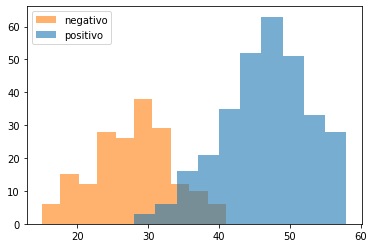

In [72]:
plt.hist(df[df.diagnosis==0].age,alpha=0.6,color='tab:orange',label='negativo')
plt.hist(df[df.diagnosis==1].age,alpha=0.6,color='tab:blue',label='positivo')

plt.legend()

In [81]:
y_pred = model.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.967479674796748

In [15]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [16]:
y_test.values

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [84]:
X_test

,age,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diabetes,family_history
525,38,13.640,15.60,87.38,575.3,0.09423,0,1
102,29,17.300,17.08,113.00,928.2,0.10080,0,0
501,45,11.140,14.07,71.24,384.6,0.07274,0,1
550,45,14.410,19.73,96.03,651.0,0.08757,1,1
494,46,13.300,21.57,85.24,546.1,0.08582,1,0
...,...,...,...,...,...,...,...,...
25,34,17.050,19.08,113.40,895.0,0.11410,0,1
368,47,9.731,15.34,63.78,300.2,0.10720,1,0
54,30,17.470,24.68,116.10,984.6,0.10490,0,1
35,29,16.160,21.54,106.20,809.8,0.10080,0,0
